In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans
import string

In [4]:
travels = pd.read_csv('test_questions.csv')

In [5]:
travels.head()


,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Unnamed: 7,Unnamed: 8,ID
0,247,5/7/2018,7:06,Kisii,Nairobi,Bus,49,NaN,1111.0,1
1,256,5/6/2018,11:08,Kisii,Nairobi,shuttle,11,NaN,NaN,2
2,275,5/4/2018,5:00,Kisii,Nairobi,shuttle,11,NaN,NaN,3
3,285,5/4/2018,9:10,Kisii,Nairobi,shuttle,11,NaN,NaN,4
4,286,5/4/2018,9:20,Kisii,Nairobi,shuttle,11,NaN,NaN,5


In [6]:
travels['travel_date']

0       5/7/2018
1       5/6/2018
2       5/4/2018
3       5/4/2018
4       5/4/2018
5       5/4/2018
6       5/4/2018
7       5/4/2018
8       5/4/2018
9       5/4/2018
10      5/4/2018
11      5/4/2018
12      5/4/2018
13      5/4/2018
14      5/4/2018
15      5/4/2018
16      5/4/2018
17      5/4/2018
18      5/4/2018
19      5/4/2018
20      5/4/2018
21      5/4/2018
22      5/4/2018
23      5/4/2018
24      5/4/2018
25      5/4/2018
26      5/4/2018
27      5/4/2018
28      5/4/2018
29      5/3/2018
          ...   
1081    5/5/2018
1082    5/5/2018
1083    5/5/2018
1084    5/5/2018
1085    5/5/2018
1086    5/5/2018
1087    5/5/2018
1088    5/5/2018
1089    5/5/2018
1090    5/5/2018
1091    5/5/2018
1092    5/5/2018
1093    5/5/2018
1094    5/6/2018
1095    5/6/2018
1096    5/6/2018
1097    5/6/2018
1098    5/6/2018
1099    5/6/2018
1100    5/6/2018
1101    5/6/2018
1102    5/6/2018
1103    5/6/2018
1104    5/6/2018
1105    5/7/2018
1106    5/7/2018
1107    5/7/2018
1108    5/7/20

In [5]:
travels.dtypes

ride_id           int64
travel_date      object
travel_time      object
travel_from      object
travel_to        object
car_type         object
max_capacity      int64
Unnamed: 7      float64
Unnamed: 8      float64
ID                int64
dtype: object

In [6]:
travels.travel_date.astype(object)

0       5/7/2018
1       5/6/2018
2       5/4/2018
3       5/4/2018
4       5/4/2018
5       5/4/2018
6       5/4/2018
7       5/4/2018
8       5/4/2018
9       5/4/2018
10      5/4/2018
11      5/4/2018
12      5/4/2018
13      5/4/2018
14      5/4/2018
15      5/4/2018
16      5/4/2018
17      5/4/2018
18      5/4/2018
19      5/4/2018
20      5/4/2018
21      5/4/2018
22      5/4/2018
23      5/4/2018
24      5/4/2018
25      5/4/2018
26      5/4/2018
27      5/4/2018
28      5/4/2018
29      5/3/2018
          ...   
1081    5/5/2018
1082    5/5/2018
1083    5/5/2018
1084    5/5/2018
1085    5/5/2018
1086    5/5/2018
1087    5/5/2018
1088    5/5/2018
1089    5/5/2018
1090    5/5/2018
1091    5/5/2018
1092    5/5/2018
1093    5/5/2018
1094    5/6/2018
1095    5/6/2018
1096    5/6/2018
1097    5/6/2018
1098    5/6/2018
1099    5/6/2018
1100    5/6/2018
1101    5/6/2018
1102    5/6/2018
1103    5/6/2018
1104    5/6/2018
1105    5/7/2018
1106    5/7/2018
1107    5/7/2018
1108    5/7/20

In [7]:
travelDate = np.array(travels['travel_date'])


In [8]:
print(travelDate)

['5/7/2018' '5/6/2018' '5/4/2018' ... '5/7/2018' '5/7/2018' '5/9/2018']


In [9]:
index = 0
days = []
for day in travelDate:
    splitDate = day.split('/')
    retrievedDay = splitDate[1]
    days.append(retrievedDay)
    
print(days)

months = []
for month in travelDate:
    splitDate = month.split('/')
    retrievedDay = splitDate[0]
    months.append(retrievedDay)
    
print(months)
number = 0
monthDay = []
for day in days:
    monthDay.append("%s.%s"%(days[number],months[number]))
    number = number+1
print(monthDay)

['7', '6', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '

In [10]:

print(monthDay)

['7.5', '6.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '2.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5'

In [11]:
m = []
d = []
for i in months:
    m.append(int(i))
print(m)
for i in days:
    d.append(int(i))
print(d)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [12]:
print(len(d))

1111


In [13]:
print(len(m))

1111


In [14]:
print(type(d))

<class 'list'>


In [15]:
print(type(m))

<class 'list'>


In [16]:
m = np.array(m)
d = np.array(d)
d = d.reshape(-1,1)
m = m.reshape(-1,1)

In [17]:
mDay = np.hstack([d,m])
print(mDay)

[[7 5]
 [6 5]
 [4 5]
 ...
 [7 5]
 [7 5]
 [9 5]]


In [18]:
clf = KMeans(n_clusters = len(travels.travel_from.unique()))
clf.fit(mDay)
centroids = clf.cluster_centers_
labels = clf.labels_

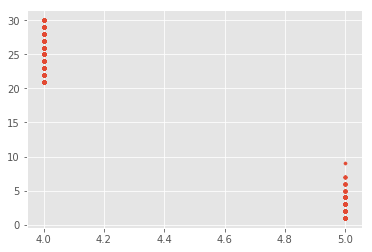

In [19]:
plt.scatter(m,d, s = 10)
plt.show()

In [20]:
colors = 3*["g.","r.","c.","b.","k."]


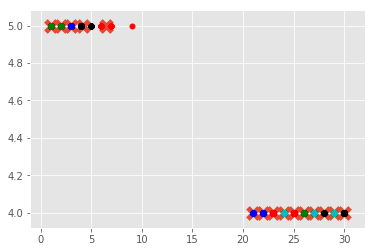

In [21]:
for i in range(len(d)):
    plt.plot(mDay[i][0],mDay[i][1] ,colors[labels[i]], markersize = 10)
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 125, linewidth = 5)
plt.show()